# Demo: Building Dynamic Computation Graphs with PyTorch

In [1]:
import numpy as np
import torch
import torch.nn as nn

In [2]:
W = torch.rand(6)

x = torch.tensor([10.0, 10.0, 10.0, 10.0, 10.0, 10.0])

b = torch.tensor(3)

In [3]:
display(W)

display(x)

display(b)

tensor([0.3046, 0.1329, 0.2175, 0.2492, 0.6001, 0.0242])

tensor([10., 10., 10., 10., 10., 10.])

tensor(3)

In [4]:
# Though the following is a simple mathematical operation, this is actually a computation graph that you've constructed.
# Now when you execute this bit of code, not only are you creating the computation graph, you're also executing it,
# and the result of this computation will be stored in the y tensor.
y = W*x + b

# proof of the imperative nature of the PyTorch execution style: As you build your graph, you're executing it dynamically.

display(y)

tensor([6.0464, 4.3286, 5.1751, 5.4920, 9.0012, 3.2421])

In [5]:
# Let's say you perform another calculation, W multiplied by x. This is an intermediate result, you get the 
# result right here on your screen. When you perform operations on actual tensors in PyTorch, the results are available for you.
# That is the nature of a dynamic computation graph.
W * x

tensor([3.0464, 1.3286, 2.1751, 2.4920, 6.0012, 0.2421])

In [6]:
b

tensor(3)

In [7]:
W1 = torch.tensor(6)
W2 = torch.tensor(6)
W3 = torch.tensor(6)

x1 = torch.tensor([2, 2, 2])
x2 = torch.tensor([3, 3, 3])
x3 = torch.tensor([4, 4, 4])

b = torch.tensor(10)

In [8]:
W1, W2, W3

(tensor(6), tensor(6), tensor(6))

In [9]:
# And if you calculate intermediate values,
# the operation is immediately performed and the results displayed to you.
intermediate_value = W1 * x1 + W2 * x2

intermediate_value

tensor([30, 30, 30])

In [10]:
# Even though you might not fully realize the dynamic nature, what you're seeing here is the dynamic computation graph that
# PyTorch builds and executes simultaneously.
# You specify the nature of your operations, whether it's for a neural network or even for simple computations.
# These operations and tensors make up your computation graph, and when you run that code,
# the computation graph is built and executed right away.

final_value = W1 * x1 + W2 * x2 + W3 * x3 + b

final_value

tensor([64, 64, 64])

# Demo: Visualizing Neural Networks in PyTorch Using Hidden Layer

TensorBoard is a great interactive tool and it really helps when you want to debug your static computation graphs.
Now there isn't really an equivalent in PyTorch, though I'm sure that someone will build it soon,
but for now, you can use hiddenlayer in order to visualize your neural networks.

Hiddenlayer was launched very recently, in November 2018. This is an open source package to quickly visualize neural network
layers.

In [11]:
import hiddenlayer as hl

In [12]:
# I'm going to set up some toy data here that you can use to pass into the neural network that we'll construct,
# however we won't really be using this toy data here in this demo.

x_train = np.array([
                    [1.7], 
                    [2.5], 
                    [5.5], 
                    [7.9], 
                    [8.8],
                    [2.4], 
                    [2.4], 
                    [8.89], 
                    [5], 
                    [4.4]
                   ],
                   dtype=np.float32)

y_train = np.array([
                    [1.9], 
                    [2.68], 
                    [4.22], 
                    [8.19], 
                    [9.69],
                    [3.4], 
                    [2.6], 
                    [8.8], 
                    [5.6], 
                    [4.7]
                   ],
                   dtype=np.float32)

In [13]:
# So I have set up X_train and Y_train in the form of tensors.
X_train = torch.tensor(x_train)
Y_train = torch.tensor(y_train)

display(X_train.shape)
display(Y_train.shape)

torch.Size([10, 1])

torch.Size([10, 1])

In [14]:
# I'm now going to construct a simple neural network using PyTorch layers.
# The input feature is just 1, output value is just 1,
# our hidden layer will contain 100 neurons.

inp = 1
out = 1
hid = 100

In [15]:
# A neural network is, after all, a computation graph at heart.
# As seen that the hidden layer package is rather lightweight and it doesn't really work with simple computation graphs 
# (e.g. just y = W*x + b), 
# which is why I'm setting up a neural network model to visualize. We'll only be constructing this neural network,
# we won't really run data through it. This is a simple sequential network with two linear layers:
# 1. A linear layer which takes the input and has 100 neurons, that is the hidden layer (notice that there is no input layer)
# 2. and a linear layer for the output.

# This is our neural network, model1, with two linear layers.
model1 = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Linear(hid, out))


(dot.exe:10956): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


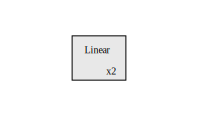

In [16]:
# You can simply call hl, for hidden layer, dot build_graph, pass in the model,
# and feed in some test data which match the dimensions
# that this neural network expects.
# Here we pass in all zeros, just to view the structure of our network,
# we pass in 10 data points and there is 1 feature for each data point (since inp is 1)
hl.build_graph(model1, torch.zeros([10, 1]))


# And here is what the resulting neural network looks like.
# There are two linear layers. You can see it multiplied by 2 here, indicating that both of these are linear layers.


(dot.exe:17676): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


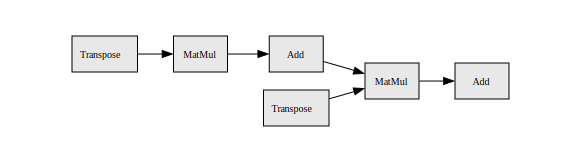

In [17]:
# Our previous input to build_graph had 10 data points.
# If you pass in a single data point into your neural network,
# I've seen that hidden layer, at least for small networks,
# will expand the visualizations in order to show you what each layer contains.

hl.build_graph(model1, torch.zeros([1]))

You can see all of the individual operations that are
performed within our two linear layers. You can see that the first layer here performs a transpose, a matrix multiplication, 
and then an add (transpose -> matmul -> add). It's a simple linear layer. 
And here is our second linear layer (transpose -> matmul -> add), once again transpose, matrix multiplication, and then add.

In [18]:
# Let's see a more complex structure of a neural network,
# two linear layers followed by sigmoid activation and then another linear layer.
# Right now you don't really need to worry about what these layers mean or what they do.
# You should just know that they are layers of our neural network and you can visualize them using hidden layer.

model2 = torch.nn.Sequential(
    torch.nn.Linear(inp, hid),  # Linear layer from inp to hid
    torch.nn.Linear(hid, hid),  # Linear layer from hid to hid
    torch.nn.Sigmoid(),         # Sigmoid activation function
    torch.nn.Linear(hid, out)   # Linear layer from hid to out
)


(dot.exe:17556): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


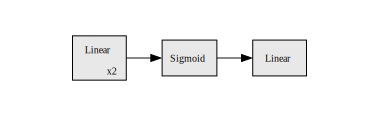

In [19]:
# Here is what a neural network looks like.
# Two linear layers, sigmoid, and then linear.


hl.build_graph(model2, torch.zeros([10, 1]))


(dot.exe:17944): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


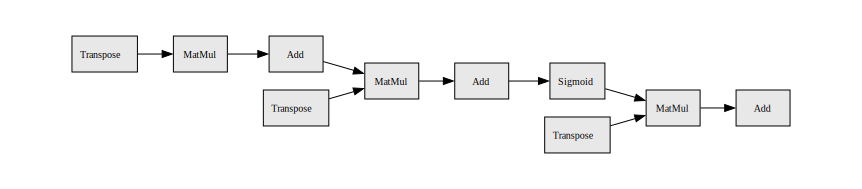

In [20]:
# And if you want a more granular view into each of these layers,
# pass in just one data point.
# Here is a model2 all expanded.
# This allows us to zoom into each of the operations
# performed by our linear layer.

hl.build_graph(model2, torch.zeros([1]))

At the time of this recording,
PyTorch really doesn't have an equivalent for TensorBoard.
You can use hidden layer,
but you can see that its functionality falls far behind what TensorBoard has to offer.
It's still an extremely useful tool for visualization though and you
should use it if you're working with neural networks.

# Computation graph visualization in Torchviz and Tensorboard

In [21]:
from torchviz import make_dot


(dot.exe:11412): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


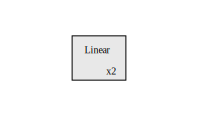


(dot.exe:17428): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


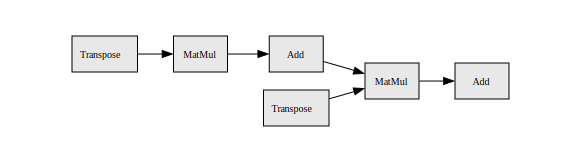


(dot.exe:2100): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


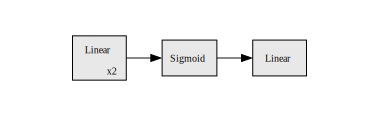


(dot.exe:13100): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


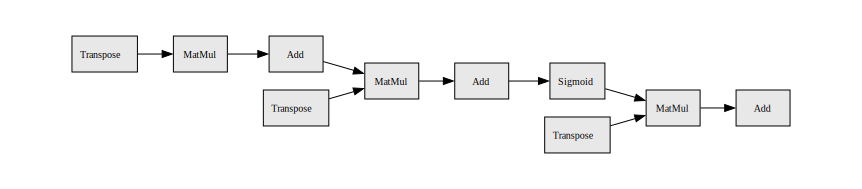

In [22]:
inp = 1
out = 1
hid = 100

# This is our neural network, model1, with two linear layers.
model1 = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Linear(hid, out))

# see layers
display(hl.build_graph(model1, torch.zeros([10, 1])))

# see more operations performed in elaborate manner
display(hl.build_graph(model1, torch.zeros([1])))


model2 = torch.nn.Sequential(
    torch.nn.Linear(inp, hid),  # Linear layer from inp to hid
    torch.nn.Linear(hid, hid),  # Linear layer from hid to hid
    torch.nn.Sigmoid(),         # Sigmoid activation function
    torch.nn.Linear(hid, out)   # Linear layer from hid to out
)



# see layers
display(hl.build_graph(model2, torch.zeros([10, 1])))

# see more operations performed in elaborate manner
display(hl.build_graph(model2, torch.zeros([1])))

In [23]:
# now achieve the same effect with torchviz

inp = 1
out = 1
hid = 100

# Define the neural network
model1 = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                             torch.nn.Linear(hid, out))

# Define input
x = torch.zeros([10, 1])

# Forward pass
output = model1(x)

# Visualize the computational graph
make_dot(output, params=dict(model1.named_parameters())).render("./torchviz/model1_graph", format="png")

# This code will save the computational graph visualization as a PNG file named model1_graph.png.
# You can change the format to "pdf" if you prefer a pdf file. 
# Note that torchviz generates graphs that visualize the computational graph at the operation level,
# which might be slightly different from the layer-level visualization produced by hiddenlayer.

'./torchviz/model1_graph.png'

In [24]:
# do it for model2

inp = 1
out = 1
hid = 100

model2 = torch.nn.Sequential(
    torch.nn.Linear(inp, hid),  # Linear layer from inp to hid
    torch.nn.Linear(hid, hid),  # Linear layer from hid to hid
    torch.nn.Sigmoid(),         # Sigmoid activation function
    torch.nn.Linear(hid, out)   # Linear layer from hid to out
)


# Define input
x = torch.zeros([10, 1])

# Forward pass
output = model2(x)

# Visualize the computational graph
make_dot(output, params=dict(model2.named_parameters())).render("./torchviz/model2_graph", format="png")

'./torchviz/model2_graph.png'

# Now with tensorboard

In [7]:
# import os
# import signal
import subprocess
pid = 21152
# kill a process via pid
# os.kill(pid, signal.SIGTERM)
subprocess.run(['taskkill', '/pid', str(pid), '/f'])

CompletedProcess(args=['taskkill', '/pid', '21152', '/f'], returncode=128)

### model1 with (10 x 1) input

In [1]:
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

In [5]:
%load_ext tensorboard

# Define the neural network
inp = 1
out = 1
hid = 100
model1 = torch.nn.Sequential(nn.Linear(inp, hid), nn.Linear(hid, out))

# Create a SummaryWriter
writer = SummaryWriter('runs/model_visualization')

# Add the model to the writer
dummy_input = torch.zeros([10, 1])
writer.add_graph(model1, dummy_input)

# Close the writer
writer.close()

# Launch TensorBoard inside the notebook
%tensorboard --logdir runs --host 0.0.0.0

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### model1 with (1 x 1) input (result is the same)

In [7]:
%reload_ext tensorboard

from torch.utils.tensorboard import SummaryWriter

# Define the neural network
inp = 1
out = 1
hid = 100
model1 = torch.nn.Sequential(nn.Linear(inp, hid), nn.Linear(hid, out))

# Create a SummaryWriter
writer = SummaryWriter('runs/model_visualization')

# Add the model to the writer
dummy_input = torch.zeros([1])
writer.add_graph(model1, dummy_input)

# Close the writer
writer.close()

# Launch TensorBoard inside the notebook
%tensorboard --logdir runs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 28876), started 0:01:02 ago. (Use '!kill 28876' to kill it.)

### model2 with (10 x 1) input

In [5]:
%reload_ext tensorboard

from torch.utils.tensorboard import SummaryWriter

# Define the neural network
inp = 1
out = 1
hid = 100

model2 = torch.nn.Sequential(
    torch.nn.Linear(inp, hid),  # Linear layer from inp to hid
    torch.nn.Linear(hid, hid),  # Linear layer from hid to hid
    torch.nn.Sigmoid(),         # Sigmoid activation function
    torch.nn.Linear(hid, out)   # Linear layer from hid to out
)

# Create a SummaryWriter
writer = SummaryWriter('runs/model_visualization')

# Add the model to the writer
dummy_input = torch.zeros([10, 1])
writer.add_graph(model2, dummy_input)

# Close the writer
writer.close()

# Launch TensorBoard inside the notebook
%tensorboard --logdir runs --port 6005